In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from src.Line import Line
from src.Nozzle import Nozzle
from src.Point import Point
from src.Profile import Profile

interactive(children=(FloatSlider(value=0.0, description='nozzle_x', max=5.0, min=-5.0), IntSlider(value=10, d…

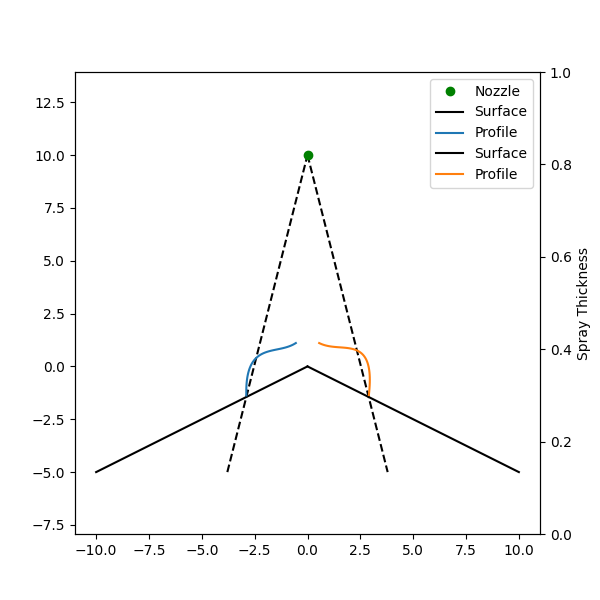

In [2]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_ylabel("Position")

ax2 = ax1.twinx()
ax2.set_ylabel("Spray Thickness")

start_x_1 = -10
start_y_1 = -5
end_x_1 = 0
end_y_1 = 0

start_x_2 = 0
start_y_2 = 0
end_x_2 = 10
end_y_2 = -5


@widgets.interact(
    nozzle_x=(-5, 5, 0.1),
    nozzle_y=(5, 40, 1),
    start_x_1=(-10, 10, 0.1),
    start_y_1=(-10, 10, 0.1),
    end_x_1=(0, 20, 0.1),
    end_y_1=(-10, 10, 0.1),
    start_x_2=(-10, 10, 0.1),
    start_y_2=(-10, 10, 0.1),
    end_x_2=(0, 20, 0.1),
    end_y_2=(-10, 10, 0.1),
)
def update(
        nozzle_x=0,
        nozzle_y=10,
        start_x_1=start_x_1,
        start_y_1=start_y_1,
        end_x_1=end_x_1,
        end_y_1=end_y_1,
        start_x_2=start_x_2,
        start_y_2=start_y_2,
        end_x_2=end_x_2,
        end_y_2=end_y_2,
):
    start_point_1 = Point(start_x_1, start_y_1)
    end_point_1 = Point(end_x_1, end_y_1)
    line_1 = Line(start_point_1, end_point_1, number_of_points=200)
    x_values_1 = line_1.get_x_values()
    y_values_1 = line_1.get_y_values()

    start_point_2 = Point(start_x_2, start_y_2)
    end_point_2 = Point(end_x_2, end_y_2)
    line_2 = Line(start_point_2, end_point_2, number_of_points=200)
    x_values_2 = line_2.get_x_values()
    y_values_2 = line_2.get_y_values()

    nozzle_position = Point(nozzle_x, nozzle_y)
    nozzle = Nozzle("nozzle1", nozzle_position)
    h_values_1 = nozzle.get_spray_height_for_line(line_1)
    h_values_2 = nozzle.get_spray_height_for_line(line_2)
    profile_1 = Profile(line_1, h_values_1)
    profile_2 = Profile(line_2, h_values_2)
    
    helper_line = Line(Point(-10, -5), Point(10, -5))
    left_outer_line = nozzle.get_left_outer_line(helper_line)
    right_outer_line = nozzle.get_right_outer_line(helper_line)

    [l.remove() for l in ax1.lines]
    ax1.clear()
    ax1.plot(left_outer_line.get_x_values(), left_outer_line.get_y_values(), "--k")
    ax1.plot(right_outer_line.get_x_values(), right_outer_line.get_y_values(), "--k")
    ax1.plot(nozzle_x, nozzle_y, "og", label="Nozzle")
    ax1.plot(x_values_1, y_values_1, 'k', label="Surface")
    ax1.plot(profile_1.get_x_values(), profile_1.get_y_values(), label="Profile")
    ax1.plot(x_values_2, y_values_2, 'k', label="Surface")
    ax1.plot(profile_2.get_x_values(), profile_2.get_y_values(), label="Profile")
    ax1.set_ylim([min(start_point_1.y, end_point_1.y, start_point_2.y, end_point_2.y) - 1, nozzle_y + 2])
    ax1.set_aspect('equal')
    ax1.legend()
